<a href="https://colab.research.google.com/github/Jhoncito07/TelecomX_LATAM-Challenge/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
# Importación de librerías esenciales para el análisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cargar datos desde la URL
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [3]:
df.shape  # Tamaño de Filas y columnas

(7267, 6)

In [4]:
df.info()  # Información de columnas y tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación



---



In [5]:
# Expandimos el DataFrame desanidando columnas
df_expandido = pd.concat([
    df.drop(['customer', 'phone', 'internet', 'account'], axis=1), # Eliminamos columnas anidadas
    pd.json_normalize(df['customer']),  # Normalizamos datos de cliente
    pd.json_normalize(df['phone']),     # Normalizamos datos de teléfono
    pd.json_normalize(df['internet']),  # Normalizamos datos de internet
    pd.json_normalize(df['account'])    # Normalizamos datos de cuenta
], axis=1)
# Mostramos las primeras filas del nuevo DataFrame
df_normalizado = df_expandido

In [6]:
df_expandido.sample(10) #Mostrando el df aleatoriamente

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
3521,4853-OITSN,No,Male,0,Yes,No,5,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,89.15,413.25
6347,8734-DKSTZ,No,Female,0,Yes,Yes,10,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,No,Electronic check,85.95,858.6
2109,2961-VNFKL,No,Female,0,Yes,No,71,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.95,1801.9
6620,9101-NTIXF,No,Male,0,No,No,2,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.40,50.6
2864,3973-SKMLN,No,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
2104,2958-NHPPS,No,Male,0,No,No,23,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20.85,473.9
2221,3096-YXENJ,No,Female,0,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),107.65,7082.85
481,0680-DFNNY,Yes,Male,0,Yes,No,15,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.10,1504.05
3840,5249-QYHEX,No,Female,0,Yes,Yes,40,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.80,1024.7
3643,5020-ZSTTY,Yes,Female,1,No,No,54,Yes,Yes,DSL,...,Yes,No,Yes,Yes,Yes,One year,No,Bank transfer (automatic),82.45,4350.1


In [7]:
df_expandido.info()  # Información de columnas y tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [8]:
# ¿Hay datos nulos?
df_expandido.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [9]:
#¿Existen duplicados?
duplicados = df[df['customerID'].duplicated(keep=False)]
duplicados

,customerID,Churn,customer,phone,internet,account


In [10]:
# Cambiamos el tipo de variable y el nombre a "Charges.Monthly" y "Charges.Total"
df_expandido['Charges.Monthly'] = pd.to_numeric(df_expandido['Charges.Monthly'], errors='coerce')
df_expandido['Charges.Total'] = pd.to_numeric(df_expandido['Charges.Total'], errors='coerce')

df_expandido.rename(columns={'Charges.Monthly': 'Charges_Monthly'}, inplace=True)
df_expandido.rename(columns={'Charges.Total': 'Charges_Total'}, inplace=True)

In [11]:
df_expandido.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [12]:
# Renombraremos ciertas columnas
df_expandido.rename(columns={
    'customerID': 'Customer_ID',
    'gender': 'Gender',
    'tenure': 'Tenure'
}, inplace=True)

In [13]:
df_expandido.tail() #Muestramos las ultimas 5 filas

,Customer_ID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.60


In [14]:
# Creamos nueva Columna y dividiendo cada valor entre 30
df_expandido['daily_accounts'] = df_expandido['Charges_Monthly'] / 30

In [15]:
df_expandido.sample(5)

,Customer_ID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,daily_accounts
2404,3352-RICWQ,No,Female,0,Yes,Yes,9,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.75,210.65,0.658333
3281,4573-JKNAE,No,Male,0,No,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.35,212.30,0.645000
291,0420-TXVSG,No,Male,0,Yes,No,66,Yes,Yes,DSL,...,Yes,No,No,No,Two year,Yes,Credit card (automatic),66.10,4428.45,2.203333
933,1319-YLZJG,No,Male,0,Yes,No,12,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.60,959.90,2.820000
1908,2696-ECXKC,No,Female,0,Yes,Yes,55,Yes,Yes,Fiber optic,...,No,No,Yes,Yes,One year,No,Mailed check,100.90,5448.60,3.363333


In [16]:
# Columnas a transformar en binario - Solo columnas puras "Yes"/"No".
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Aplicamos la transformación a binario
df_expandido[binary_cols] = df_expandido[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

df_expandido.sample(5)

,Customer_ID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,daily_accounts
5749,7854-EKTJL,Yes,Female,0,0,1,2,1,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Electronic check,19.60,35.85,0.653333
5085,6953-PBDIN,No,Male,0,1,0,70,1,Yes,DSL,...,Yes,Yes,Yes,No,Two year,0,Bank transfer (automatic),72.95,5265.55,2.431667
320,0463-WZZKO,No,Male,0,0,0,3,1,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Credit card (automatic),20.75,67.10,0.691667
1918,2716-GFZOR,No,Male,0,1,0,43,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Credit card (automatic),86.10,3551.65,2.870000
1205,1724-IQWNM,No,Male,0,0,1,1,1,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Mailed check,19.30,19.30,0.643333


In [17]:
# Reemplazar "No phone service" por "No" en MultipleLines.
df_expandido['MultipleLines'] = df_expandido['MultipleLines'].replace('No phone service', 'No')
df_expandido['MultipleLines'].value_counts()

,count
MultipleLines,
No,4202
Yes,3065


In [18]:
# Convertir "Yes"/"No" a 1/0 en MultipleLines.
df_expandido['MultipleLines'] = df_expandido['MultipleLines'].map({'Yes': 1, 'No': 0})
df_expandido['MultipleLines'].head()

,MultipleLines
0,0
1,1
2,0
3,0
4,0


In [19]:
df_expandido.Contract.value_counts()

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


In [20]:
# Reemplazar valores en Contract según criterios definidos.
contract_mapping = {
    'Month-to-month': 1,
    'One year': 2,
    'Two year': 3
}

df_contract = pd.DataFrame(list(contract_mapping.items()), columns=['Contract Type', 'Code'])
print(df_contract)

    Contract Type  Code
0  Month-to-month     1
1        One year     2
2        Two year     3


In [21]:
# Columnas donde "Sí" será 1 y el resto 0.
binary_cols_2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in binary_cols_2:
    df_expandido[col] = df_expandido[col].apply(lambda x: 1 if x == 'Yes' else 0)

df_expandido

,Customer_ID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,daily_accounts
0,0002-ORFBO,No,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


In [22]:
# Recorremos la columna 'Churn'.
# Si el valor es 'Yes' o 'No', lo conservamos tal cual.
# Para cualquier otro valor, lo reemplazamos por 'N/A'.
df_expandido['Churn'] = df_expandido['Churn'].apply(lambda x: x if x == 'Yes' or x =='No' else 'N/A')
df_expandido

,Customer_ID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,daily_accounts
0,0002-ORFBO,No,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


In [23]:
df_expandido['Churn'].value_counts() #conteo de valores

,count
Churn,
No,5174
Yes,1869
N/A,224


In [24]:
df_final = df_expandido

In [25]:
df_final.to_json('Churn_de_Clientes.json', index= False)



---


#📊 Carga y análisis

In [26]:
# Análisis descriptivo de métricas numéricas
df_final.describe()

,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges_Monthly,Charges_Total,daily_accounts
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2280.634213,2.157337
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,400.225000,1.180833
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.343333
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3785.300000,2.995833
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [27]:
# Conteo de clientes activos y dados de baja agrupados por 'Churn'
df_1 = df_final.groupby('Churn').size().reset_index(name='Total')
df_1 = df_1.set_index('Churn')
df_1

,Total
Churn,
N/A,224
No,5174
Yes,1869


####**Gráfico circular que muestra la proporción de clientes activos y cancelados**

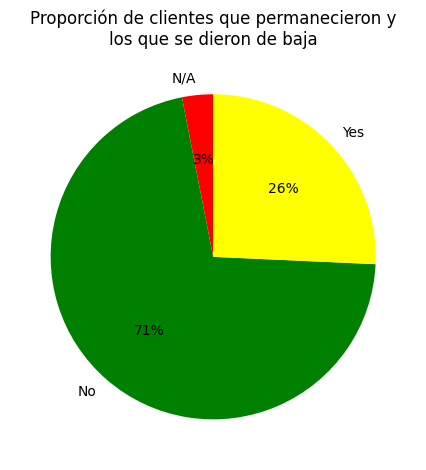

In [28]:
df_1['Total'].plot.pie(
    autopct='%1.0f%%',
    startangle=90,
    colors=['red', 'green', 'yellow'],
    title='Proporción de clientes que permanecieron y\nlos que se dieron de baja'
)
plt.ylabel('')  # Oculta etiqueta del eje Y
plt.tight_layout()
plt.savefig('grafico_churn.png', dpi=300)
plt.show()

In [29]:
# Filtrado de clientes que se dieron de baja (Churn = "Yes")
client_evade = df_final.query('Churn == "Yes"')
client_evade

,Customer_ID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,daily_accounts
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
18,0022-TCJCI,Yes,Male,1,0,0,45,1,0,DSL,...,1,0,0,1,One year,0,Credit card (automatic),62.70,2791.50,2.090000
19,0023-HGHWL,Yes,Male,1,0,0,1,0,0,DSL,...,0,0,0,0,Month-to-month,1,Electronic check,25.10,25.10,0.836667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,9961-JBNMK,Yes,Male,1,0,0,21,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Bank transfer (automatic),96.80,2030.30,3.226667
7246,9965-YOKZB,Yes,Male,1,0,0,9,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,83.85,790.15,2.795000
7260,9985-MWVIX,Yes,Female,0,0,0,1,1,0,Fiber optic,...,0,0,0,0,Month-to-month,1,Mailed check,70.15,70.15,2.338333
7261,9986-BONCE,Yes,Female,0,0,0,4,1,0,No,...,0,0,0,0,Month-to-month,0,Bank transfer (automatic),20.95,85.50,0.698333


####**Mapa de calor del churn según género, contrato e InternetService**



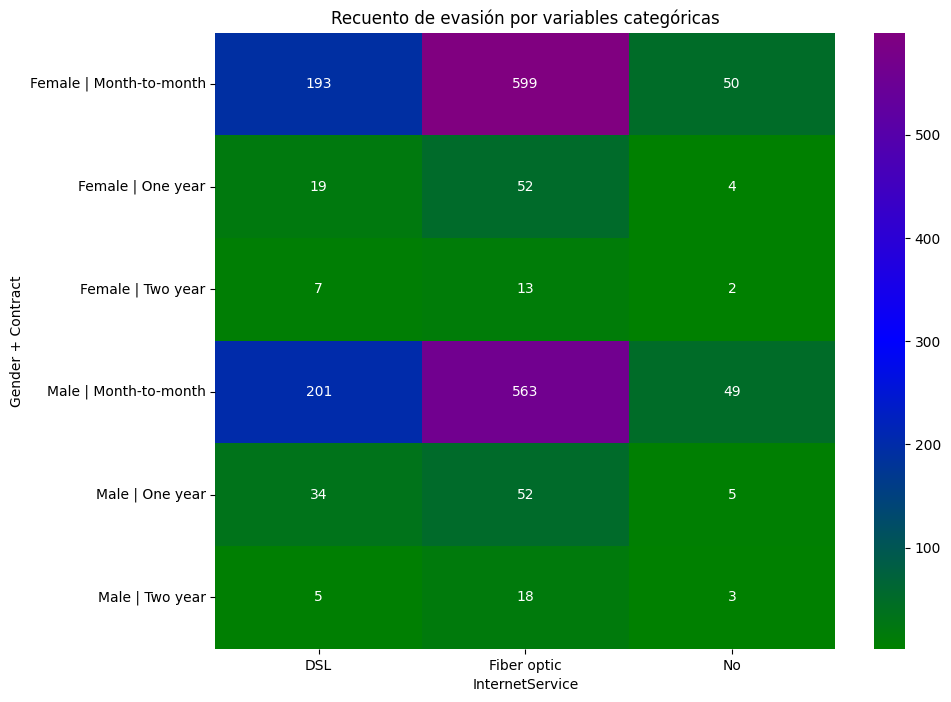

In [30]:
from matplotlib.colors import LinearSegmentedColormap
client_evade[['Gender','InternetService','Contract']].value_counts()
cliente_evade = client_evade.copy()

cliente_evade['Gender_Contract'] = cliente_evade['Gender'] + " | " + cliente_evade['Contract']

heatmap_data = cliente_evade.groupby(['Gender_Contract', 'InternetService']).size().unstack()

semaforo = LinearSegmentedColormap.from_list("violeta_custom", ["green", "blue", "purple"])

plt.figure(figsize=(10, 8))

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap=semaforo)
plt.title('Recuento de evasión por variables categóricas')
plt.xlabel('InternetService')
plt.ylabel('Gender + Contract')
plt.show()

#### **Boxplot comparativo para variables numéricas por estado de Churn**

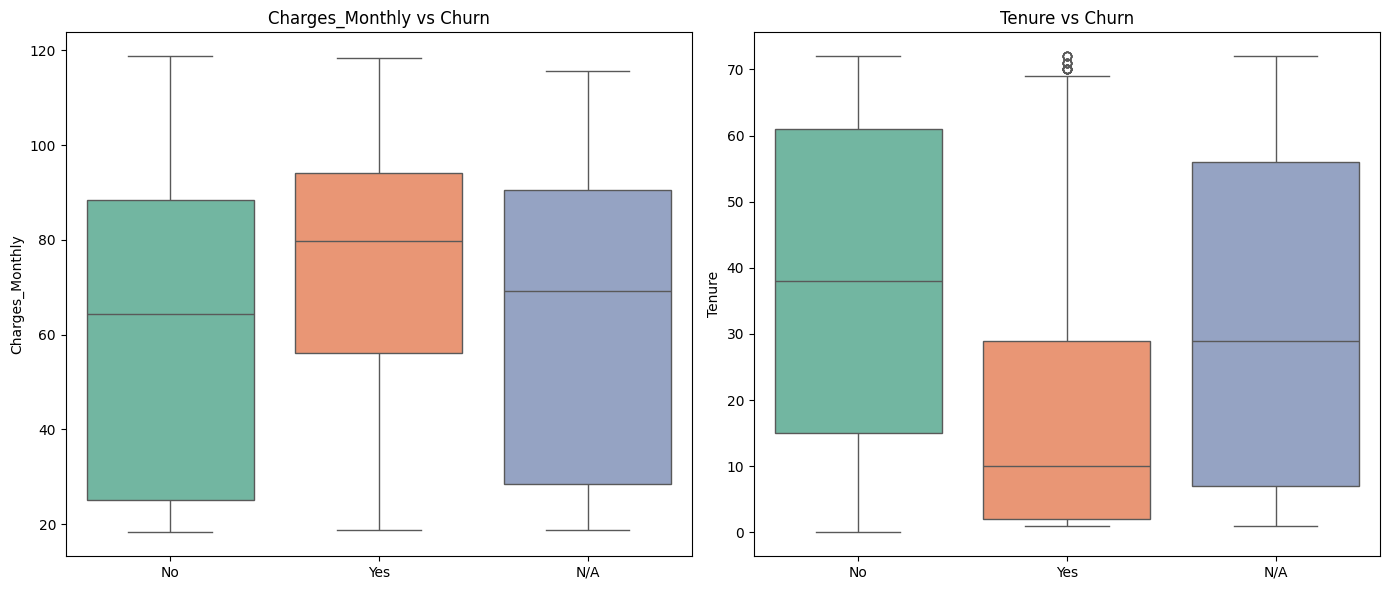

In [31]:
variables = ['Charges_Monthly', 'Tenure']
df_churn = df_final[variables + ['Churn']]

plt.figure(figsize=(14, 6))
for i, var in enumerate(variables, 1):
    plt.subplot(1, len(variables), i)
    sns.boxplot(x='Churn', y=var, data=df_churn, palette='Set2')
    plt.title(f'{var} vs Churn')
    plt.xlabel('')
plt.tight_layout()
plt.show()



---



# 📄 **Informe de Análisis de Churn en TelecomX**

## 1. Introducción
El objetivo de este análisis fue identificar los principales factores que provocan la evasión de clientes (**Churn**) en **TelecomX**. Entender por qué los clientes cancelan sus servicios es crucial para desarrollar estrategias de retención efectivas y asegurar la rentabilidad de la compañía.

## 2. Tratamiento de Datos
Para preparar los datos para el análisis, se ejecutaron los siguientes pasos clave:
* **Extracción y Transformación**: Se cargaron los datos desde un archivo JSON y se aplanó su estructura anidada para crear un formato tabular.
* **Limpieza y Estandarización**: Se verificó la ausencia de datos nulos o duplicados. Las columnas categóricas (ej. `Partner`, `Dependents`, servicios de internet) se convirtieron a un formato numérico binario (**1** para "Sí", **0** para "No") para facilitar el análisis.
* **Ajuste de Tipos de Datos**: Se corrigieron los tipos de datos, especialmente en las columnas de cargos (`Charges.Monthly`, `Charges.Total`), para permitir cálculos numéricos.

## 3. Análisis Exploratorio y Hallazgos Clave
El análisis visual de los datos reveló patrones claros sobre los clientes que abandonan el servicio:
* **Tasa de Churn General**: La compañía tiene una tasa de churn del **27%**, una cifra considerable que impacta directamente en los ingresos.
* **Perfil de Mayor Riesgo**: El mapa de calor muestra que la combinación de **Contrato Mes a Mes** y servicio de **Fibra Óptica** concentra la mayor cantidad de cancelaciones. Este segmento es el más vulnerable.
* **Impacto de la Antigüedad y el Costo**: Los diagramas de caja revelaron que:
    * Los clientes que cancelan tienen una antigüedad mucho menor (mediana de **10 meses** vs. **40 meses** de clientes leales).
    * Estos clientes también pagan cargos mensuales más altos, sugiriendo una posible insatisfacción con la relación costo-beneficio.

---
*(Gráficos: 1. Proporción de Churn, 2. Mapa de Calor por Contrato e Internet, 3. Boxplots de Antigüedad y Cargos Mensuales)*
---

## 4. Conclusiones y Recomendaciones Estratégicas
**Conclusión Principal**: El churn en TelecomX está fuertemente impulsado por clientes nuevos con planes flexibles (**mes a mes**) y servicios premium (**fibra óptica**), que probablemente no perciben un valor suficiente para justificar el costo a largo plazo.

**Recomendaciones**:
### Acciones de Retención Focalizadas:
* Crear ofertas de descuento para que los clientes del segmento de **Fibra Óptica + Contrato Mensual** migren a planes de 1 o 2 años.

### Optimizar la Experiencia del Cliente Nuevo:
* Reforzar el proceso de *onboarding* durante los primeros **3 meses** para construir lealtad y demostrar el valor del servicio.

### Evaluar la Oferta de Fibra Óptica:
* Analizar la estructura de precios y la calidad del servicio de fibra para asegurar que sea competitiva y cumpla con las expectativas de los clientes que pagan más.